
# Interest Rate Models: Modeling Interest Rate Movements

## Overview
Interest rate models are used to simulate the evolution of interest rates over time. These models help in pricing interest rate derivatives, managing risk, and understanding how interest rates respond to various economic conditions.

In this notebook, we will explore three popular interest rate models:

- **Vasicek Model**: A mean-reverting model for interest rates.
- **Cox-Ingersoll-Ross (CIR) Model**: A model that prevents negative interest rates, often used for short-term rate modeling.
- **Hull-White Model**: A model that allows time-varying mean reversion and volatility.

We will use real data from the U.S. 10-year Treasury yield (downloaded via `yfinance`) to inform the parameters of our models.



## 1. Data Retrieval

We'll use `yfinance` to download historical data for the U.S. 10-year Treasury yield. This data will provide a real-world basis for our interest rate model simulations.

[*********************100%***********************]  1 of 1 completed


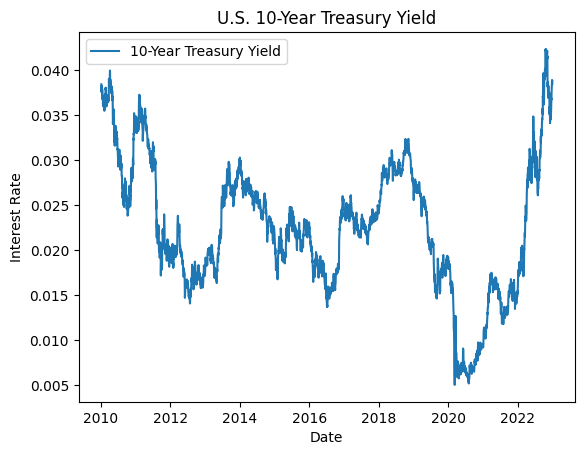

In [1]:

import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for U.S. 10-year Treasury yield
data = yf.download("^TNX", start="2010-01-01", end="2023-01-01")
data['Close'] = data['Close'] / 100  # Convert to decimal for modeling

# Plot the historical yield data
plt.plot(data.index, data['Close'], label="10-Year Treasury Yield")
plt.xlabel("Date")
plt.ylabel("Interest Rate")
plt.title("U.S. 10-Year Treasury Yield")
plt.legend()
plt.show()



## 2. Vasicek Model

The Vasicek model is a mean-reverting stochastic process for modeling interest rates. The dynamics are given by:

\[ dr_t = \kappa (\theta - r_t) dt + \sigma dW_t \]

where:
- \( r_t \) is the interest rate at time \( t \).
- \( \kappa \) is the speed of mean reversion.
- \( \theta \) is the long-term mean level.
- \( \sigma \) is the volatility.

Let's simulate the Vasicek model using estimated parameters.


/var/folders/dh/0b_p8wpd1pdfpv1ds98qbrrh0000gn/T/ipykernel_4675/3640695222.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rates_vasicek[0] = r0
/var/folders/dh/0b_p8wpd1pdfpv1ds98qbrrh0000gn/T/ipykernel_4675/3640695222.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rates_vasicek[t] = rates_vasicek[t - 1] + dr


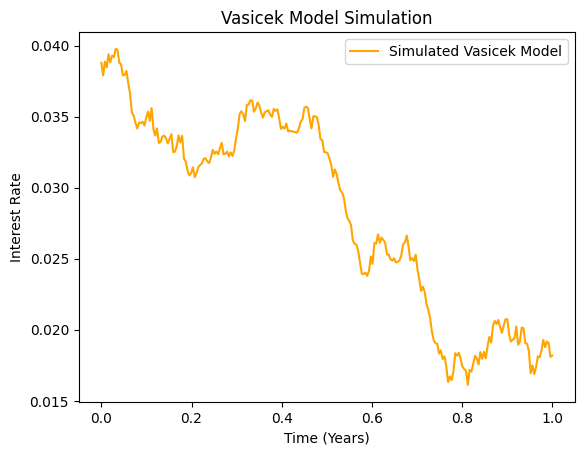

In [2]:

import numpy as np

# Vasicek model parameters (hypothetical for demonstration)
kappa = 0.15  # Speed of mean reversion
theta = data['Close'].mean()  # Long-term mean estimated from data
sigma = 0.01  # Volatility
r0 = data['Close'].iloc[-1]  # Initial rate from the last available data point
T = 1.0  # Total time in years
dt = 1/252  # Time step (daily)
num_steps = int(T / dt)

# Simulate Vasicek process
rates_vasicek = np.zeros(num_steps)
rates_vasicek[0] = r0

for t in range(1, num_steps):
    dr = kappa * (theta - rates_vasicek[t - 1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
    rates_vasicek[t] = rates_vasicek[t - 1] + dr

# Plot the Vasicek simulation
time = np.linspace(0, T, num_steps)
plt.plot(time, rates_vasicek, label="Simulated Vasicek Model", color="orange")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.title("Vasicek Model Simulation")
plt.legend()
plt.show()



## 3. Cox-Ingersoll-Ross (CIR) Model

The CIR model extends the Vasicek model by preventing negative interest rates:

\[ dr_t = \kappa (\theta - r_t) dt + \sigma \sqrt{r_t} dW_t \]

The \( \sqrt{r_t} \) term ensures non-negative rates. This model is often used for modeling short-term interest rates.


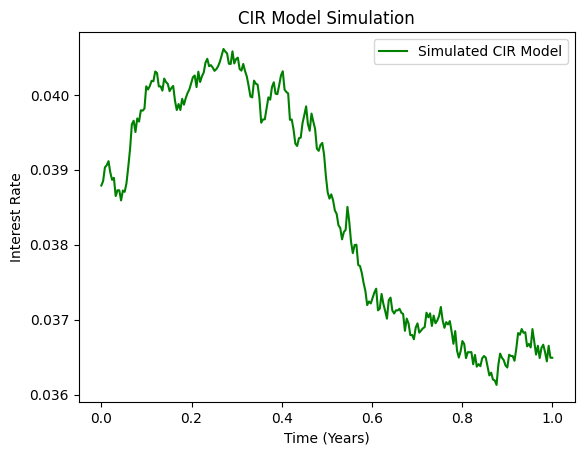

In [6]:
# CIR model simulation with corrected scalar values
theta = data['Close'].mean().item()  # Extracted as a float
r0 = data['Close'].iloc[-1].item()  # Extracted as a float

# Parameters
rates_cir = np.zeros(num_steps)
rates_cir[0] = r0

for t in range(1, num_steps):
    dr = kappa * (theta - rates_cir[t - 1]) * dt + sigma * np.sqrt(max(rates_cir[t - 1], 0)) * np.sqrt(dt) * np.random.normal()
    rates_cir[t] = max(rates_cir[t - 1] + dr, 0)

# Plot the CIR simulation
plt.plot(time, rates_cir, label="Simulated CIR Model", color="green")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.title("CIR Model Simulation")
plt.legend()
plt.show()



## 4. Hull-White Model

The Hull-White model is an extension of the Vasicek model that allows time-varying mean and volatility:

\[ dr_t = \kappa (\theta(t) - r_t) dt + \sigma(t) dW_t \]

This flexibility makes the Hull-White model suitable for capturing complex dynamics in interest rates.


/var/folders/dh/0b_p8wpd1pdfpv1ds98qbrrh0000gn/T/ipykernel_4675/784639659.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rates_hull_white[0] = r0
/var/folders/dh/0b_p8wpd1pdfpv1ds98qbrrh0000gn/T/ipykernel_4675/784639659.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rates_hull_white[t] = rates_hull_white[t - 1] + dr


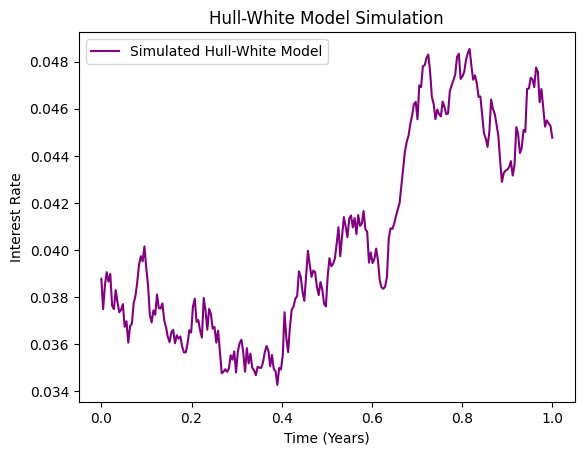

In [4]:

# Hull-White model parameters (using the same parameters for simplicity)
theta_t = data['Close'].rolling(window=252).mean().fillna(theta)  # Approximate time-varying mean
sigma_t = sigma  # Constant volatility for simplicity
rates_hull_white = np.zeros(num_steps)
rates_hull_white[0] = r0

# Simulate Hull-White process
for t in range(1, num_steps):
    dr = kappa * (theta_t.iloc[min(t, len(theta_t) - 1)] - rates_hull_white[t - 1]) * dt + sigma_t * np.sqrt(dt) * np.random.normal()
    rates_hull_white[t] = rates_hull_white[t - 1] + dr

# Plot the Hull-White simulation
plt.plot(time, rates_hull_white, label="Simulated Hull-White Model", color="purple")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.title("Hull-White Model Simulation")
plt.legend()
plt.show()



## Summary

In this notebook, we explored:

- **Vasicek Model**: A mean-reverting interest rate model.
- **Cox-Ingersoll-Ross (CIR) Model**: A model ensuring non-negative rates, commonly used for short-term rates.
- **Hull-White Model**: A flexible model with time-varying mean and volatility.

These models provide valuable tools for interest rate analysis, risk management, and pricing interest rate derivatives.
